In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Setting the dataset path
import pathlib
data_dir = pathlib.Path('C:/Users/Admin/Downloads/archive (2)/train')

In [3]:
# Count the total number of images in a mask directory
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

13572


In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 13572 files belonging to 100 classes.
Using 10858 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 13572 files belonging to 100 classes.
Using 2714 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'roller 

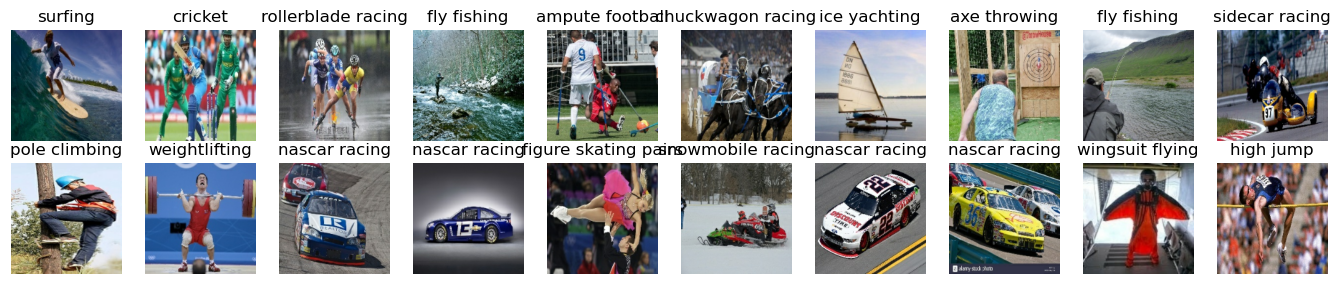

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 17))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
# Create the MODEL

num_classes = len(class_names)

model = Sequential([
    #input Layer
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  
    #hidden layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
    #fully connect network
  layers.Flatten(),#flatten
  layers.Dense(128, activation='relu'),#fully connect network
  layers.Dense(num_classes)#output layer
])

In [10]:
# Compile the MODEL

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# Train the MODEL

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
340/340 [==============================] - 320s 938ms/step - loss: 4.1255 - accuracy: 0.0723 - val_loss: 3.6190 - val_accuracy: 0.1396
Epoch 2/10
340/340 [==============================] - 278s 816ms/step - loss: 3.1715 - accuracy: 0.2190 - val_loss: 3.1265 - val_accuracy: 0.2443
Epoch 3/10
340/340 [==============================] - 264s 776ms/step - loss: 2.4062 - accuracy: 0.3793 - val_loss: 3.0198 - val_accuracy: 0.2911
Epoch 4/10
340/340 [==============================] - 270s 793ms/step - loss: 1.6435 - accuracy: 0.5583 - val_loss: 3.3511 - val_accuracy: 0.2900
Epoch 5/10
340/340 [==============================] - 261s 768ms/step - loss: 0.9746 - accuracy: 0.7312 - val_loss: 3.9813 - val_accuracy: 0.2789
Epoch 6/10
340/340 [==============================] - 399s 1s/step - loss: 0.5034 - accuracy: 0.8617 - val_loss: 4.9432 - val_accuracy: 0.2716
Epoch 7/10
340/340 [==============================] - 286s 839ms/step - loss: 0.2813 - accuracy: 0.9229 - val_loss: 5.4807 - va

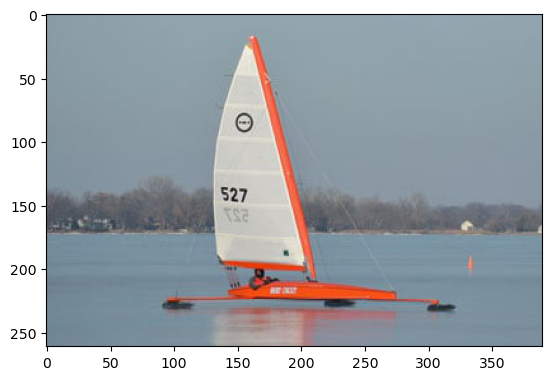

<PIL.Image.Image image mode=RGB size=180x180 at 0x2759947DBE0>
1/1 [==============================] - 0s 231ms/step
predictions   [[ -9.347131   -12.0545435   -4.2669444   -4.325931    -7.05154
   -8.214668    -8.851803   -10.89327    -11.877397    -3.1392994
   -8.417299    -1.1667184   -8.472964    -3.2731829  -14.337057
  -16.30551    -16.197975    -1.497299    -5.9552073   -5.2796645
  -11.564577   -13.435049   -12.375465   -10.432246    -6.344268
   -5.628078   -12.328468   -23.681414   -12.216002    -9.862637
    1.222968   -12.453588   -11.77549     -1.7458823   -7.223264
   -7.828138    -1.0087602   -4.0755224   -0.04252756 -21.60397
   -8.296153   -11.605494    -7.178899   -19.90463     -2.1530724
   -5.2925973   -6.0383506   -1.4320308    5.201717    -9.010412
   -2.2819805  -19.83079     -8.467067   -18.505281    -1.8255415
   -9.385923   -17.419462    -2.517827   -12.159191   -12.352247
   -5.1170273   -3.3490906   -5.8321614   -0.8009674  -17.016247
   -5.327666    -9.4497

In [12]:
# Predict the MODEL

pic = r'C:\Dhruv\ice_yatching.jpg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(pic)
imgplot = plt.imshow(img)
plt.show()

# for i in pic:
img = tf.keras.utils.load_img(pic, target_size=(180, 180))
print(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print("predictions  ", predictions)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
    )